In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [102]:
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

citydata_df = pd.read_csv(city_data)
ridedata_df = pd.read_csv(ride_data)

In [103]:
ridedata_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [104]:
citydata_df.head()



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [110]:
#clean data into new dataset
average_ride_cost = round(ridedata_df.groupby('city')['fare'].mean(),2)
number_of_rides = ridedata_df.groupby('city')['fare'].count()
total_fares = ridedata_df.groupby('city')['fare'].sum()
city = ridedata_df['city'].unique()
clean_ridedata = pd.DataFrame({'city':city,'Fare Sales':total_fares,'Number of Rides':number_of_rides,'Average Ride':average_ride_cost})

clean_ridedata= clean_ridedata[['city','Number of Rides','Fare Sales','Average Ride']]

clean_ridedata.

Index(['city', 'Number of Rides', 'Fare Sales', 'Average Ride'], dtype='object')

In [123]:
#merge clean_data set with fixed values 

merged_df = pd.merge(clean_ridedata,citydata_df,how='left', on='city')
merged_df = merged_df.rename(columns={'city':'City','driver_count':'Number of Drivers','type':'Type of City'})
merged_df['Average Ride']=merged_df['Average Ride'].map('${:,.2f}'.format)
merged_df['Fare Sales']=merged_df['Fare Sales'].map('${:,.2f}'.format)
merged_df

,City,Number of Rides,Fare Sales,Average Ride,Number of Drivers,Type of City
0,Sarabury,31,$741.79,$23.93,46,Urban
1,South Roy,26,$535.85,$20.61,35,Urban
2,Wiseborough,9,$335.84,$37.32,55,Urban
3,Spencertown,22,$519.75,$23.62,68,Urban
4,Nguyenbury,19,$417.65,$21.98,8,Urban
5,New Jeffrey,31,$778.30,$25.11,58,Urban
6,Port Johnstad,15,$505.67,$33.71,22,Urban
7,Jacobfort,10,$366.06,$36.61,52,Urban
8,Travisville,29,$736.47,$25.40,37,Urban
9,Sandymouth,12,$372.62,$31.05,11,Urban


In [107]:
#bubble chart

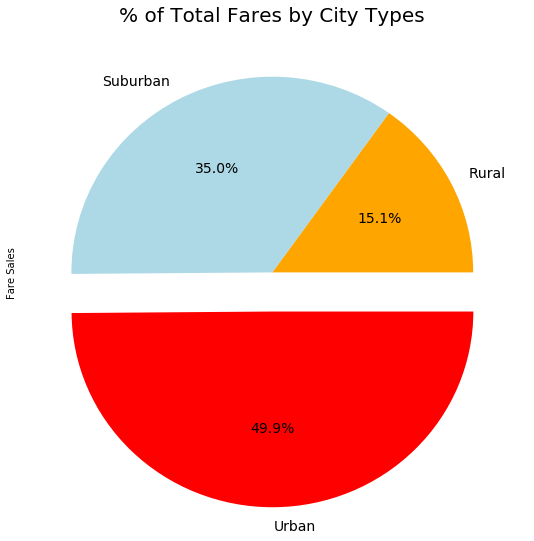

In [118]:

#percentage of total fares by city types
total_fares_by_city = merged_df.groupby('Type of City')['Fare Sales'].sum()

colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totalridesbycity = total_fares_by_city.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totalridesbycity.set_title("% of Total Fares by City Types", fontsize = 20)
plt.show()


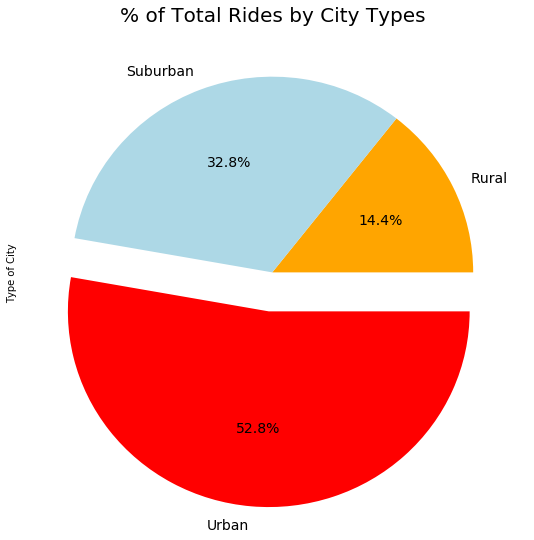

In [108]:
#%  of total rides by city types
type_group = merged_df.groupby('Type of City')
count_groupbyrides = type_group['Type of City'].count()
count_groupbyrides
colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totalrides = count_groupbyrides.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totalrides.set_title("% of Total Rides by City Types", fontsize = 20)
plt.show()

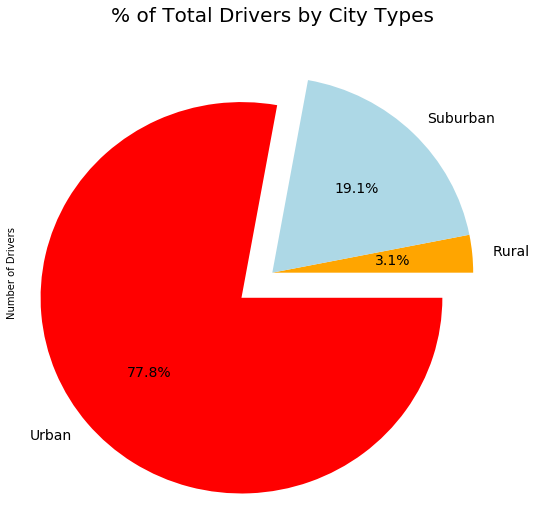

In [119]:
#percentage of total drivers by city types pie graph
total_drivers_by_citytype = merged_df.groupby('Type of City')['Number of Drivers'].sum()
colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totaldrivers_by_city = total_drivers_by_citytype.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totaldrivers_by_city.set_title("% of Total Drivers by City Types", fontsize = 20)
plt.show()